In [1]:
import pandas as pd
import requests

# Fetch data from the API
url = "https://api.coincap.io/v2/assets"
response = requests.get(url)
data = response.json()['data']

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate data types
numeric_columns = ['rank', 'supply', 'maxSupply', 'marketCapUsd', 'volumeUsd24Hr', 'priceUsd', 'changePercent24Hr', 'vwap24Hr']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort by changePercent24Hr to get highest and lowest movers
df_sorted = df.sort_values('changePercent24Hr', ascending=False)

# Calculate basic statistics
highest_movers = df_sorted.head(5)
lowest_movers = df_sorted.tail(5)

print("Top 5 Highest Movers:")
print(highest_movers[['name', 'symbol', 'priceUsd', 'changePercent24Hr']])

print("\nTop 5 Lowest Movers:")
print(lowest_movers[['name', 'symbol', 'priceUsd', 'changePercent24Hr']])

print("\nBasic Statistics:")
print(df['changePercent24Hr'].describe())

# Bitcoin specific statistics
bitcoin_data = df[df['symbol'] == 'BTC'].iloc[0]
print("\nBitcoin Statistics:")
print(f"Current Price: ${float(bitcoin_data['priceUsd']):.2f}")
print(f"24h Change: {float(bitcoin_data['changePercent24Hr']):.2f}%")
print(f"24h Volume: ${float(bitcoin_data['volumeUsd24Hr']):.2f}")
print(f"Market Cap: ${float(bitcoin_data['marketCapUsd']):.2f}")

Top 5 Highest Movers:
            name symbol   priceUsd  changePercent24Hr
91          Celo   CELO   0.660159          20.713297
64        Chiliz    CHZ   0.066511           7.920972
93         Golem    GLM   0.346959           6.072528
18  UNUS SED LEO    LEO   5.804704           4.540809
36     Injective    INJ  22.514210           2.816820

Top 5 Lowest Movers:
         name symbol  priceUsd  changePercent24Hr
27     Stacks    STX  1.875847          -4.439921
81      IoTeX   IOTX  0.044710          -4.687020
34  The Graph    GRT  0.178837          -4.762600
85    Raydium    RAY  1.526284          -6.072225
59    Conflux    CFX  0.156231          -7.978308

Basic Statistics:
count    100.000000
mean      -0.946543
std        3.185148
min       -7.978308
25%       -2.385918
50%       -1.342764
75%       -0.057622
max       20.713297
Name: changePercent24Hr, dtype: float64

Bitcoin Statistics:
Current Price: $63161.50
24h Change: -1.81%
24h Volume: $12786958365.62
Market Cap: $1248005

/var/folders/m0/wj79nd7n7_j03g4gcc4pdlnc0000gn/T/ipykernel_53133/1154801819.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='symbol', y='priceUsd', data=top_20, palette='coolwarm')


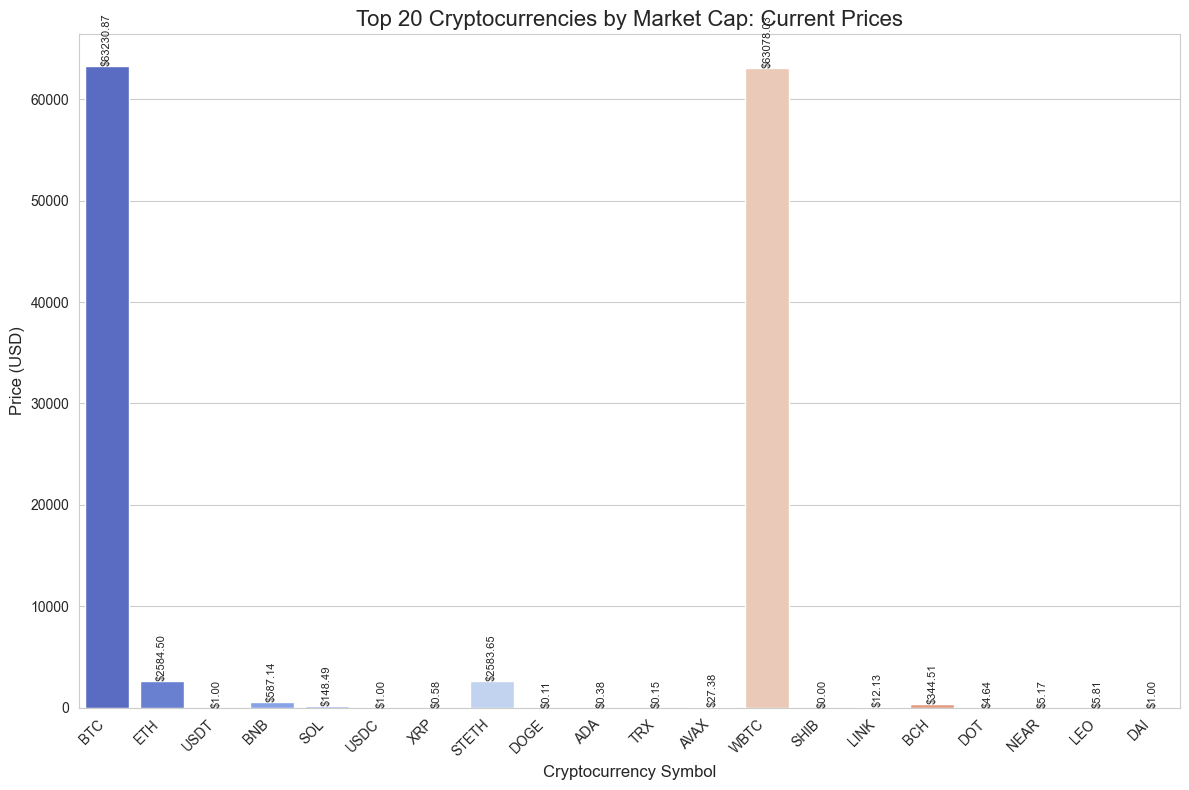

Current Bitcoin Price: $63230.87


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure we have the latest data
url = "https://api.coincap.io/v2/assets"
response = requests.get(url)
data = response.json()['data']
df = pd.DataFrame(data)

# Convert numeric columns to appropriate data types
numeric_columns = ['rank', 'supply', 'maxSupply', 'marketCapUsd', 'volumeUsd24Hr', 'priceUsd', 'changePercent24Hr', 'vwap24Hr']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort by market cap (descending) and select top 20 cryptocurrencies
top_20 = df.sort_values('marketCapUsd', ascending=False).head(20)

# Set up the plot style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(x='symbol', y='priceUsd', data=top_20, palette='coolwarm')

# Customize the plot
plt.title('Top 20 Cryptocurrencies by Market Cap: Current Prices', fontsize=16)
plt.xlabel('Cryptocurrency Symbol', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_20['priceUsd']):
    ax.text(i, v, f'${v:.2f}', ha='center', va='bottom', fontsize=8, rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print Bitcoin's current price for reference
bitcoin_price = df[df['symbol'] == 'BTC']['priceUsd'].values[0]
print(f"Current Bitcoin Price: ${bitcoin_price:.2f}")